In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Data_Train.csv')
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [5]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [6]:
df['COST'].unique()

array([ 1200,  1500,   800,   300,   600,  1600,   200,   900,   400,
        1400,   350,   500,   450,   700,  1000,   250,  2000,  1100,
         100,   850,  2500,  1800,   150,   650,  3500,   750,   950,
        1300,   180,  2100,   550,    50,  1900,  1750,  1350,    60,
        2200,  5000,    80,  3300,  3800,  1450,  4000,  2800,   120,
        4500,  2400,  1700,  3000,  2600,  5200, 14000,  1550,  4200,
        3700,  1150,  2700,   130,  8000,  3200,  5500,  6500,  1050,
       10000,  3600,   313,  3400,  2300,  3100,  1250,    20,  1650,
        1850,  6000,   140,  4100,  4050,  2900,   599,  7000,   299,
         370,  1950,   320,  1260,    70], dtype=int64)

In [7]:
for column in df.columns:
    if df[column].dtypes ==object:
        print(str(column)+ ':' +str(df[column].unique()))
        print(df[column].value_counts())
        print('__________________________________________________')
        print('\n')

TITLE:['CASUAL DINING' 'CASUAL DINING,BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'QUICK BITES,BEVERAGE SHOP' 'CASUAL DINING,IRANI CAFE'
 'BAKERY,QUICK BITES' 'None' 'BAR,CASUAL DINING' 'BAR' 'PUB'
 'BEVERAGE SHOP' 'FINE DINING' 'CAFÉ,QUICK BITES'
 'BEVERAGE SHOP,DESSERT PARLOR' 'SWEET SHOP,QUICK BITES'
 'DESSERT PARLOR,SWEET SHOP' 'BAKERY' 'BAKERY,DESSERT PARLOR' 'BAR,LOUNGE'
 'FOOD COURT' 'LOUNGE' 'DESSERT PARLOR,BEVERAGE SHOP'
 'LOUNGE,CASUAL DINING' 'FOOD TRUCK' 'QUICK BITES,FOOD COURT' 'SWEET SHOP'
 'BEVERAGE SHOP,FOOD COURT' 'PUB,CASUAL DINING' 'MESS'
 'MICROBREWERY,CASUAL DINING' 'CASUAL DINING,SWEET SHOP' 'KIOSK'
 'QUICK BITES,KIOSK' 'CLUB' 'FINE DINING,BAR' 'DESSERT PARLOR,QUICK BITES'
 'FOOD COURT,QUICK BITES' 'LOUNGE,CAFÉ' 'BAKERY,CONFECTIONERY'
 'CASUAL DINING,CAFÉ' 'DHABA' 'CAFÉ,DESSERT PARLOR'
 'QUICK BITES,DESSERT PARLOR' 'PUB,MICROBREWERY' 'LOUNGE,BAR'
 'DESSERT PARLOR,CAFÉ' 'CAFÉ,BAR' 'SWEET SHOP,CONFECTIONERY'
 'CASUAL DINING,PUB' 'MICROBREWERY,BAR' 'DE

In [8]:
df.drop('RESTAURANT_ID',axis=1,inplace=True)

we are dropping this column beacause it contain ids which are unique to every dish.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TITLE     12690 non-null  object
 1   CUISINES  12690 non-null  object
 2   TIME      12690 non-null  object
 3   CITY      12578 non-null  object
 4   LOCALITY  12592 non-null  object
 5   RATING    12688 non-null  object
 6   VOTES     11486 non-null  object
 7   COST      12690 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 793.2+ KB


In [10]:
for col in ['CITY','LOCALITY','RATING','VOTES']:
    df[col].fillna(df[col].mode()[0],inplace=True)

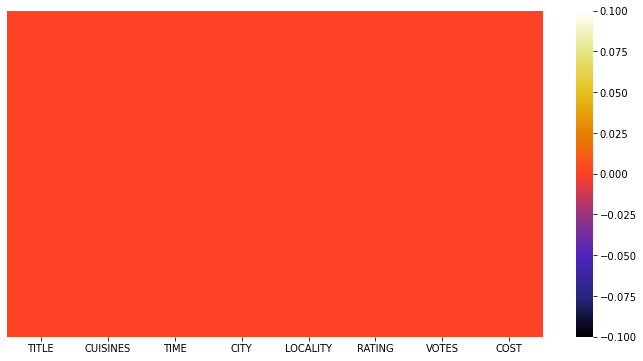

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cmap='CMRmap',yticklabels=False)

In [12]:
df.isnull().values.any()

False

no null values are present in the data now

# data analysis:
    univirate

mean value 655.2522458628841


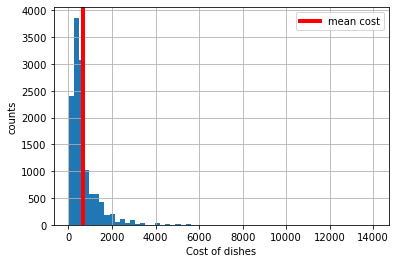

In [13]:
cost=df['COST'].hist(bins=60)
mean_value=np.mean(df['COST'])
plt.axvline(mean_value,linewidth=4,color='red',label='mean cost')
plt.xlabel('Cost of dishes')
plt.ylabel('counts')
plt.legend()
print('mean value',np.mean(df['COST']))



300      1595
400      1357
500      1300
200      1031
600       806
         ... 
4100        1
70          1
14000       1
1950        1
80          1
Name: COST, Length: 86, dtype: int64


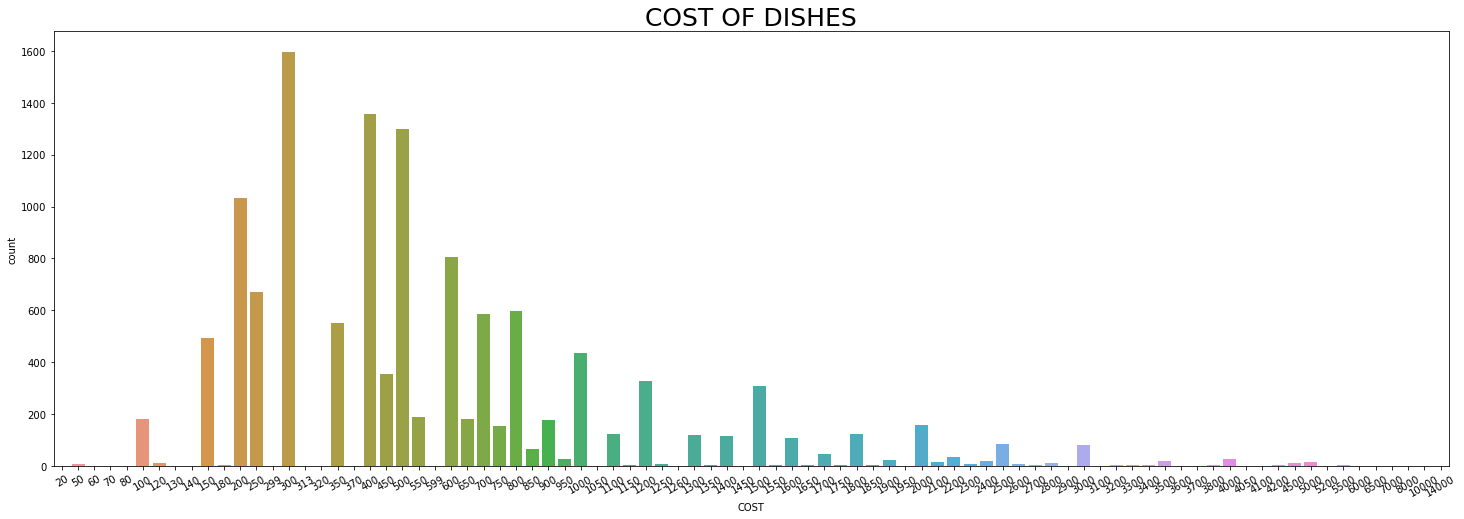

In [14]:
plt.figure(figsize=(25,8))
sns.countplot(x='COST',data=df)
plt.xticks(rotation=30)
plt.title('COST OF DISHES',size=25)
print('\n')
print(df['COST'].value_counts())

FROM THIS FIGURE WE CONCLUDE THE MAXIMUM FREQUENCY OF A DISH IS COSTING THE RATE OF 300.

In [15]:
le=LabelEncoder()
df['RATING']=le.fit_transform(df['RATING'])

In [16]:
df['RATING'].unique()

array([17, 23, 19, 22, 21, 24, 20, 14, 15,  0, 26, 16, 25,  8, 18, 28, 31,
       12,  6, 27,  9, 11, 13,  7, 10, 30, 29,  5,  4,  1,  2,  3])



20    1240
19    1190
21    1099
18    1086
17     951
22     936
16     771
23     723
31     707
15     575
24     556
0      495
14     365
25     362
13     266
26     199
10     186
12     186
11     170
9      146
27     141
8       89
28      69
7       61
6       35
29      32
30      22
5       15
4       10
2        3
3        2
1        2
Name: RATING, dtype: int64


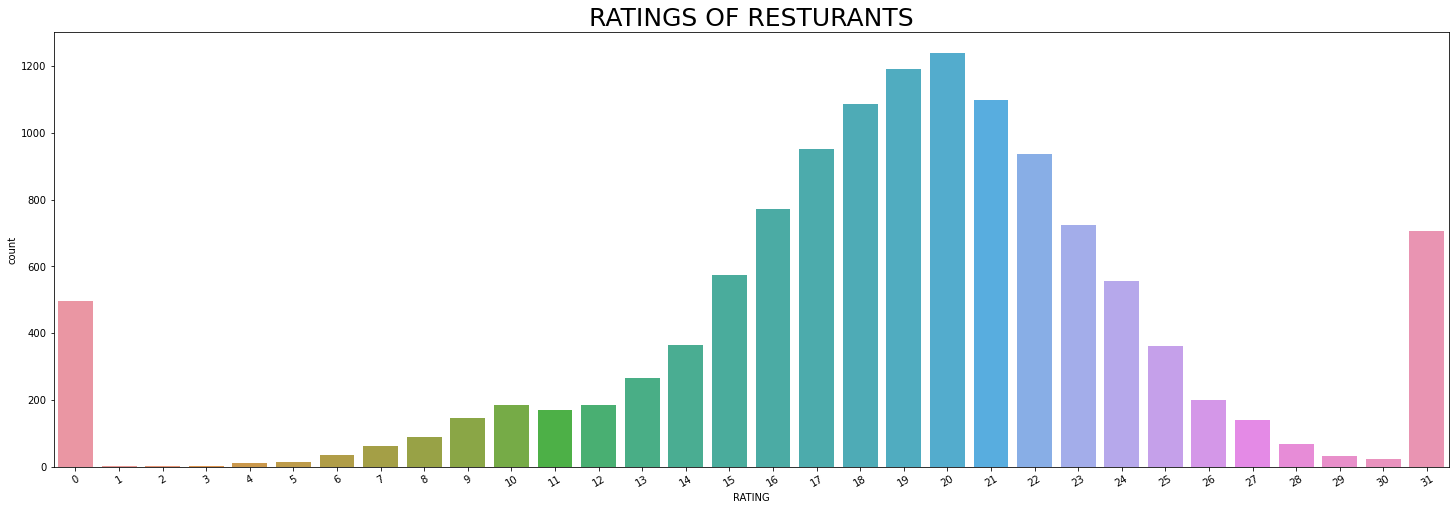

In [17]:
plt.figure(figsize=(25,8))
sns.countplot(x='RATING',data=df)
plt.xticks(rotation=30)
plt.title('RATINGS OF RESTURANTS',size=25)
print('\n')
print(df['RATING'].value_counts())

MAXIMUM RATING GIVEN TO RESTRO'S IS 20.



Chennai                                 2286
Bangalore                               2149
Hyderabad                               1819
Mumbai                                  1722
New Delhi                               1321
                                        ... 
Bangalore Koramangala 7th Block            1
Grant Road West                            1
Kanakapura Road Banglore                   1
Madhuranagar                               1
Kochi International Airport VIP Road       1
Name: CITY, Length: 359, dtype: int64


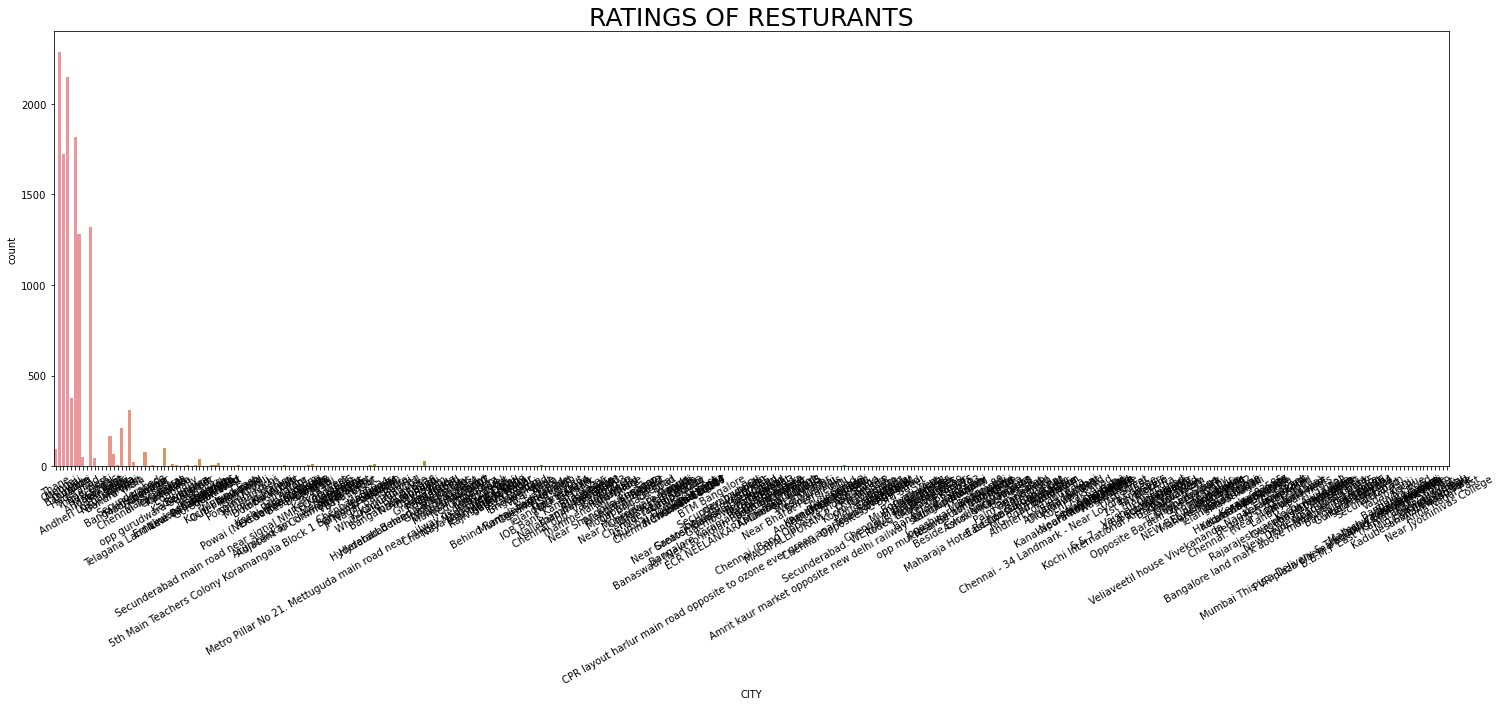

In [18]:
plt.figure(figsize=(25,8))
sns.countplot(x='CITY',data=df)
plt.xticks(rotation=30)
plt.title('RATINGS OF RESTURANTS',size=25)
print('\n')
print(df['CITY'].value_counts())

In [19]:
for column in df.columns:
    if df[column].dtype==object:
        df[column]=le.fit_transform(df[column])

In [20]:
df.skew()

TITLE      -0.069803
CUISINES   -0.218782
TIME        0.306186
CITY        0.266332
LOCALITY    0.352317
RATING     -0.803390
VOTES      -0.316806
COST        3.978801
dtype: float64

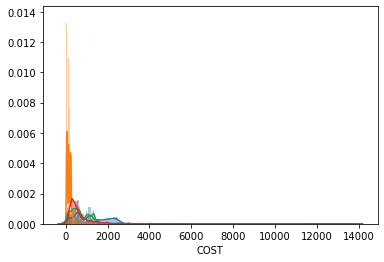

In [21]:
for column in df.columns:
    if df[column].skew()>0.05:
        sns.distplot(df[column])

all most all the values lie in the negative column

# bivariate anaylsis.

Text(0.5, 1.0, 'Correlation with the target variable')

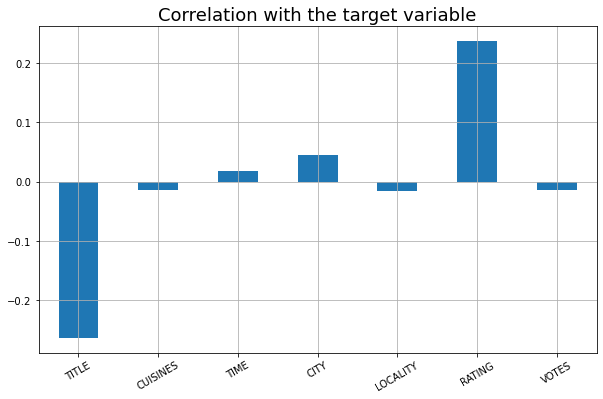

In [22]:
plt.figure(figsize=(10,6))
df.drop('COST',axis=1).corrwith(df['COST']).plot(kind='bar',grid=True)
plt.xticks(rotation=30)
plt.title('Correlation with the target variable',size=18)

time,city,rating is directly dependent with cost of dishes.



values as per the type RATING  COST
0       200     102
        300      90
        150      65
        400      65
        250      37
               ... 
31      50        1
        950       1
        1350      1
        2300      1
        3000      1
Name: COST, Length: 869, dtype: int64


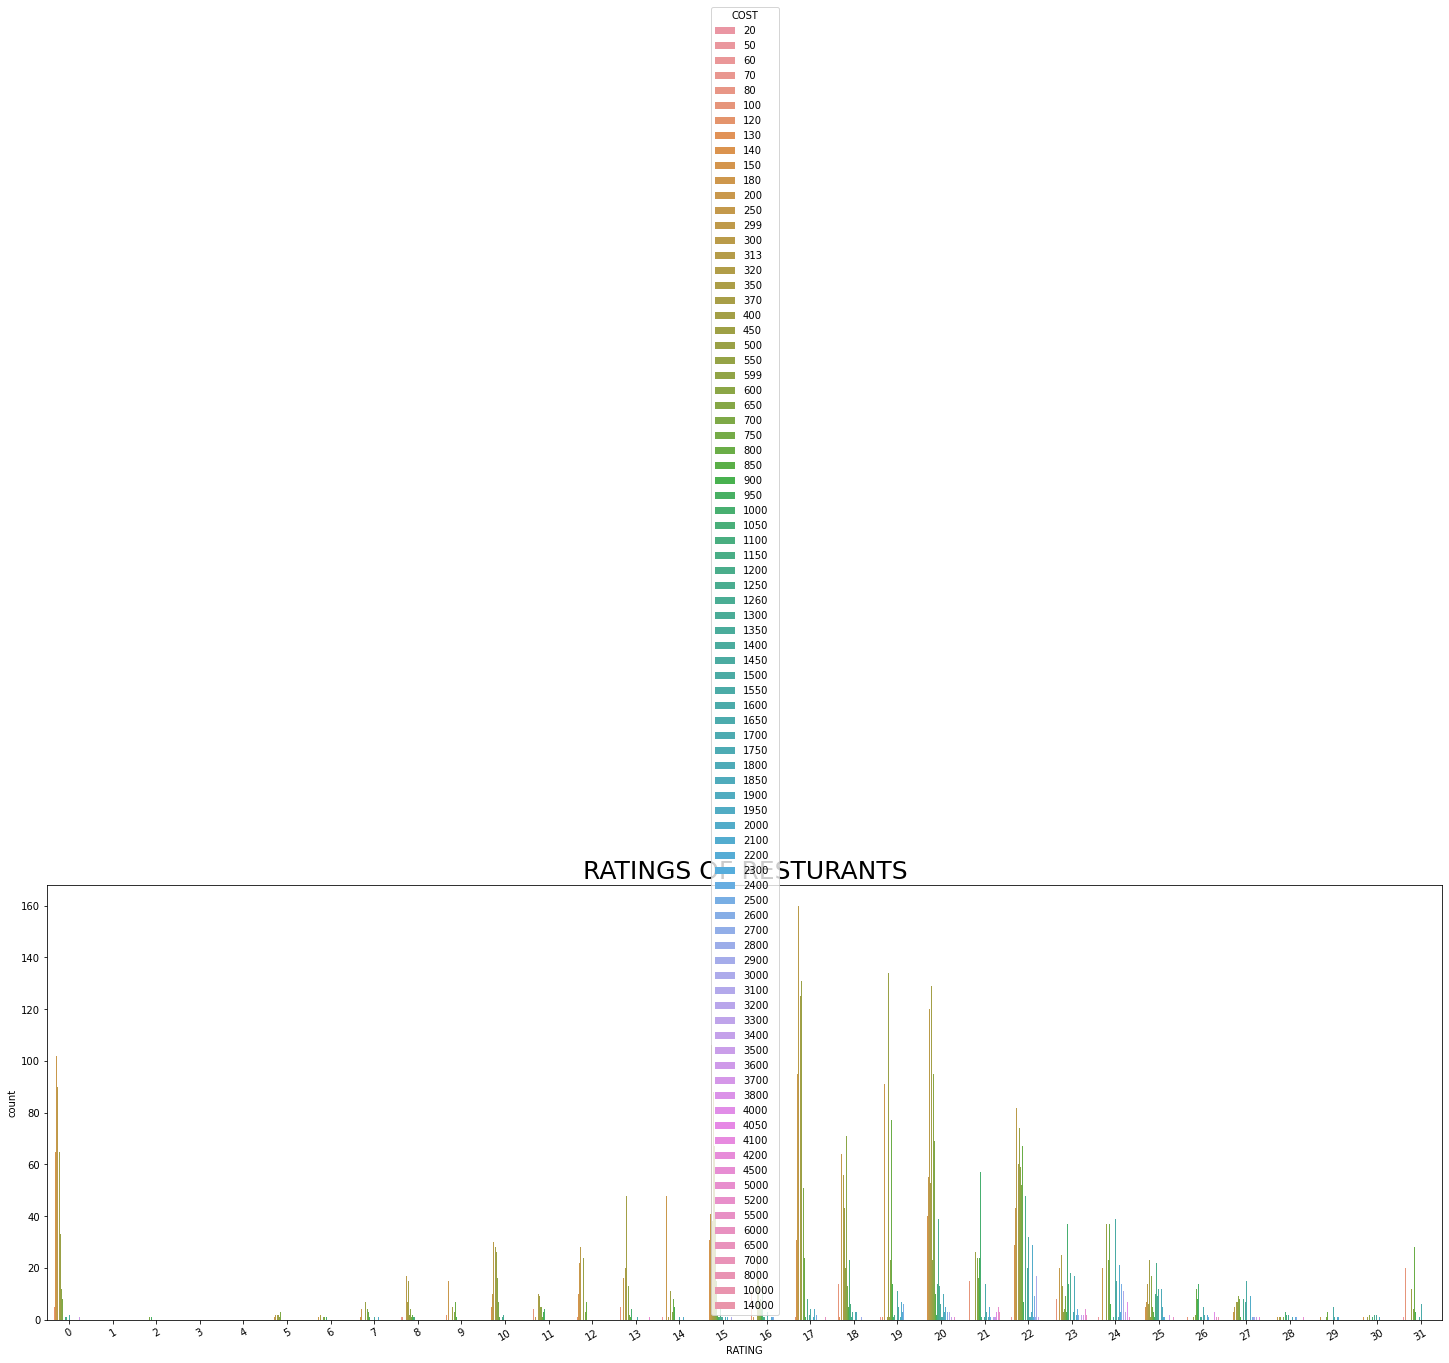

In [23]:
plt.figure(figsize=(25,8))
sns.countplot(x='RATING',hue='COST',data=df)
plt.xticks(rotation=30)
plt.title('RATINGS OF RESTURANTS',size=25)
print('\n')
print('values as per the type',df.groupby('RATING')['COST'].value_counts())

MAXIMUM RATING RECEIVED IS 200 AS PER THE COST OF THE DISH.

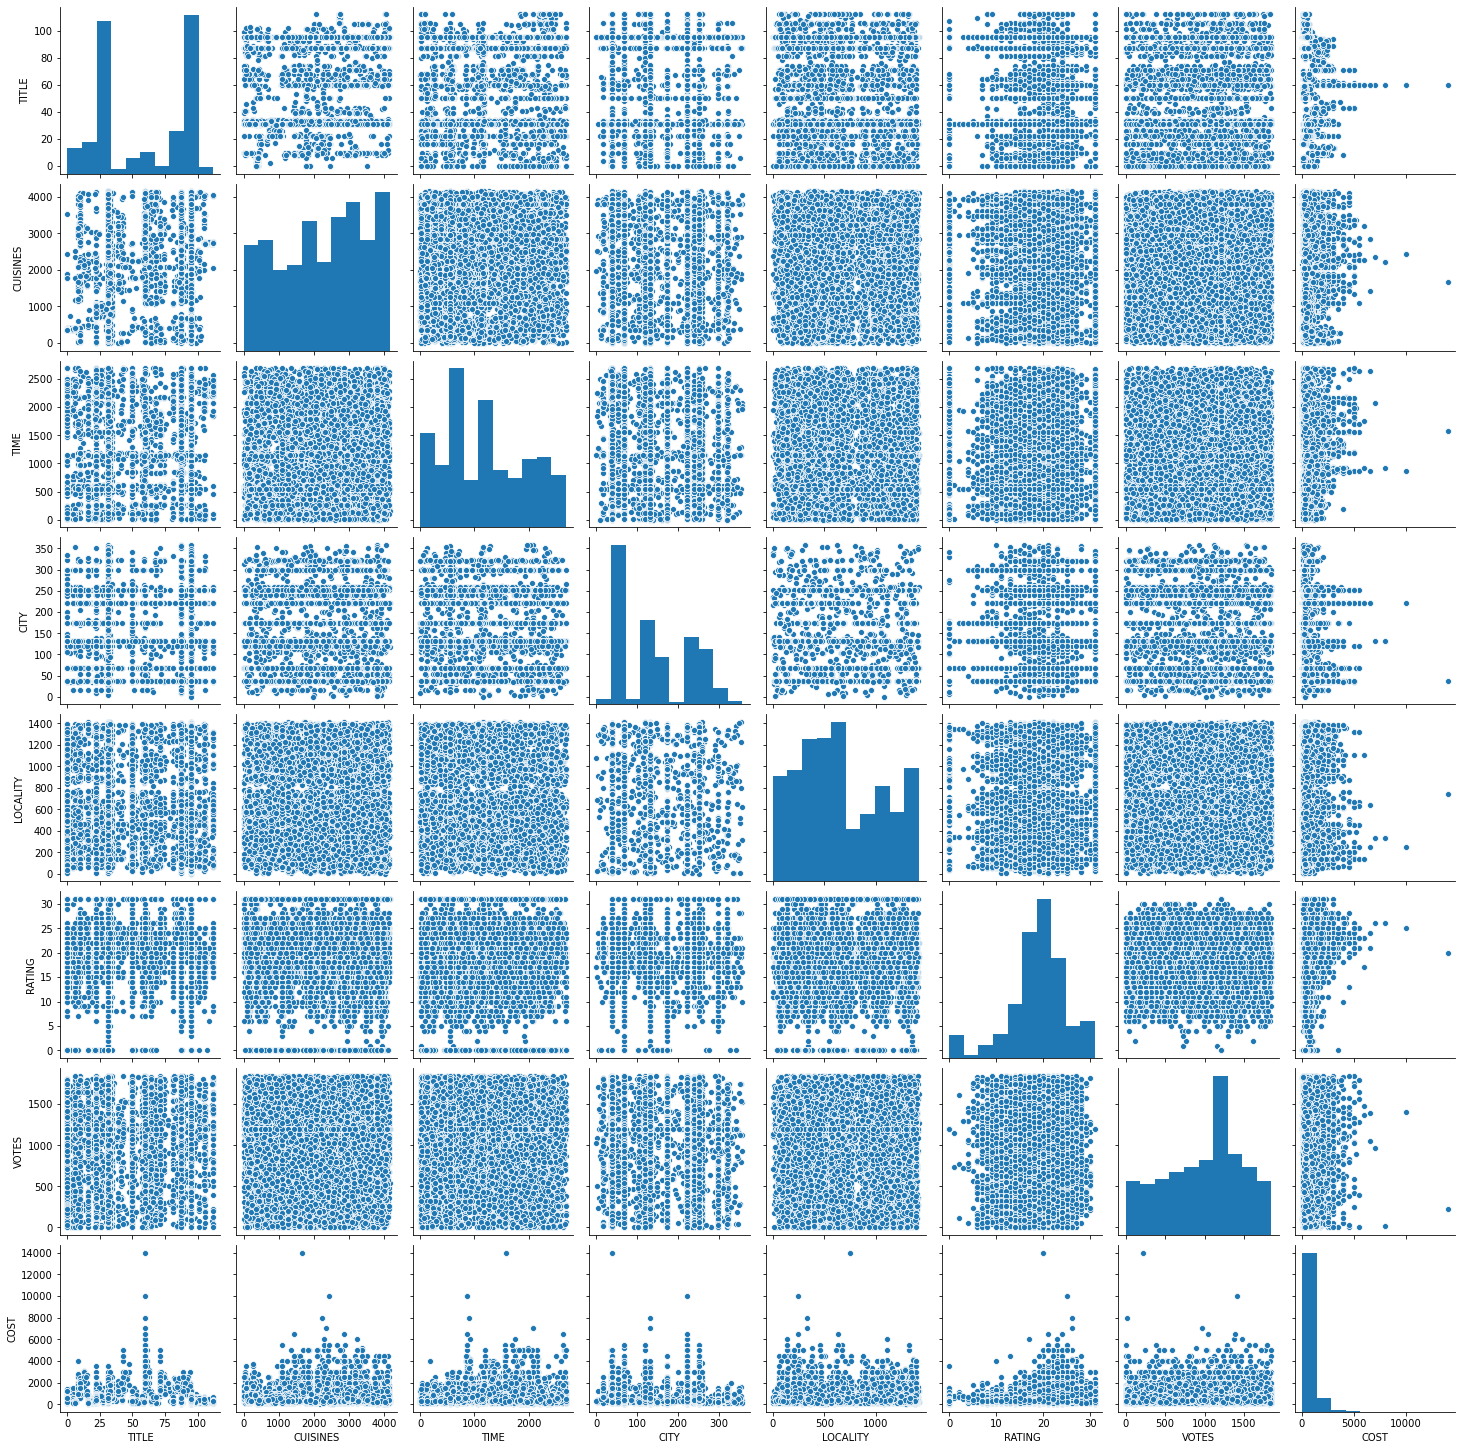

In [24]:
sns.pairplot(df)

In [25]:
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,739,320,285,17,1278,1200
1,33,289,1885,67,1046,23,950,1500
2,31,2976,661,67,1101,19,712,800
3,95,4130,275,222,136,22,787,800
4,50,1766,615,222,620,19,470,300
...,...,...,...,...,...,...,...,...
12685,95,2934,1144,131,342,19,1349,500
12686,33,2143,1177,222,133,24,191,1800
12687,71,2088,1137,239,1342,21,1428,1300
12688,31,3506,1837,67,631,16,996,400


In [26]:
collist=df.columns.values
ncol=13
nrow=10
collist

array(['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES',
       'COST'], dtype=object)

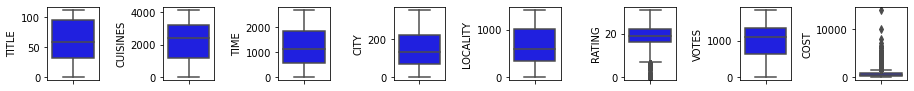

In [27]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(ncol,nrow,i+1)
    sns.boxplot(df[collist[i]],color='blue',orient='v')
    plt.tight_layout()

THERE ARE SOME OUTLIERS PRESENT ON RATING IN REFERENCE WITH COST. 

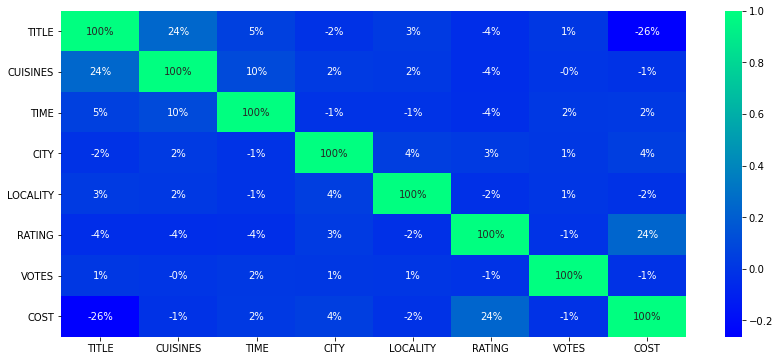

In [28]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),cmap='winter',fmt='.0%',annot=True)

TITLE IS NEGATIVELY CORRELATED WITH COST.

# REMOVING OUTLIERS

In [29]:
threshold=3
z=np.abs(zscore(df))

In [30]:
z

array([[0.86888688, 0.32540837, 0.58465845, ..., 0.29054698, 0.59388432,
        0.86884552],
       [0.80783894, 1.61638078, 0.93436872, ..., 0.68015275, 0.08589126,
        1.34733058],
       [0.86888688, 0.61526483, 0.68804774, ..., 0.0330196 , 0.57914305,
        0.23086546],
       ...,
       [0.35207201, 0.12224961, 0.057108  , ..., 0.35658617, 0.9047573 ,
        1.02834054],
       [0.86888688, 1.055448  , 0.87074455, ..., 0.45233026, 0.00944312,
        0.40711461],
       [0.86888688, 0.59034881, 0.4574101 , ..., 0.61411355, 1.06433876,
        0.08812458]])

In [31]:
df_new=df[(z<3).all(axis=1)]

In [32]:
print(df.shape,('\t'),df_new.shape)

(12690, 8) 	 (11972, 8)


we have removed all the outliers that are present in our dataset.

In [33]:
df=df_new

In [34]:
x=df.drop('COST',axis=1)

In [35]:
y=df['COST']

In [36]:
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)

# model selection

In [37]:
model=[LinearRegression(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),ExtraTreesRegressor()]

In [47]:
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.80,random_state=42)
    m.fit(x_train,y_train)
    print('the score for',m,m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('errors for:',m)
    print('Mean Squared Error:',mean_squared_error(y_test,predm))
    print('Mean Absolute Error:',mean_absolute_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score:',r2_score(y_test,predm))
    print('______________________________________________________________________________________')

the score for LinearRegression() 0.18415730652057827
errors for: LinearRegression()
Mean Squared Error: 159829.4227837275
Mean Absolute Error: 279.19091960518796
Root Mean Squared Error: 399.7867216200752
r2_score: 0.20765152237010098
______________________________________________________________________________________
the score for SVR() 0.12304341103034455
errors for: SVR()
Mean Squared Error: 171535.63609282076
Mean Absolute Error: 262.948921193726
Root Mean Squared Error: 414.16860828993396
r2_score: 0.14961840097904222
______________________________________________________________________________________
the score for KNeighborsRegressor() 0.5576487843218054
errors for: KNeighborsRegressor()
Mean Squared Error: 133130.79959916492
Mean Absolute Error: 249.32158663883087
Root Mean Squared Error: 364.8709355363413
r2_score: 0.34000896361374333
______________________________________________________________________________________
the score for DecisionTreeRegressor() 0.99999938061276

from this we can say that our model is working best with random forest regressor.

In [48]:
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Model',m)
    print('score',score)
    print('mean score of',m,'is:',score.mean())
    print('standard deviation of',m,'is-',score.std())
    print('_________________________________________________________________')

Model LinearRegression()
score [0.18310222 0.18462781 0.19432156 0.17759206 0.19321435]
mean score of LinearRegression() is: 0.18657159968972561
standard deviation of LinearRegression() is- 0.006334591275850248
_________________________________________________________________
Model SVR()
score [0.12334419 0.14950756 0.12259563 0.10455593 0.11461374]
mean score of SVR() is: 0.12292340978377883
standard deviation of SVR() is- 0.0149225767536709
_________________________________________________________________
Model KNeighborsRegressor()
score [0.32131013 0.29141607 0.33535953 0.34082849 0.36800533]
mean score of KNeighborsRegressor() is: 0.33138390748233976
standard deviation of KNeighborsRegressor() is- 0.025080045843696795
_________________________________________________________________
Model DecisionTreeRegressor()
score [0.45807312 0.37550284 0.37371608 0.40679856 0.47241277]
mean score of DecisionTreeRegressor() is: 0.4173006767844639
standard deviation of DecisionTreeRegressor() i

as per the cross validation score also the best model for the given dataset is random forest regressor.